In [ ]:
import os
import datetime
import numpy as np 
import matplotlib.pyplot as plt
#os.chdir('../'); print(os.getcwd())
os.chdir('/Users/edouardpaupe/Desktop/magnify-main_DATABASE')
print(os.getcwd())

from src.flex import (plot_power_bounds_for_episode,
                    extract_daily_zone_bounds,
                    power_to_energy_bounds,
                    max_duration_for_constant_power,
                    slice_for_episode,
                    envelope_for_zone_day,
                    full_envelope_for_zone,
                    load_daily_bounds,
                    process_power_bounds)

/Users/edouardpaupe/Desktop/magnify-main


In [3]:
#1) Load the UB and LB data previsouly generated
save_dir = "/Users/edouardpaupe/Desktop/magnify-main/data/power_bounds/"
bounds_dict = load_daily_bounds(save_dir)
print(bounds_dict.keys())

#format of the keys: 'build{building_num}_clim{climate_id}_day{day_of_year}_zone{zone0-4}_UB' or 
#'build{building_num}_clim{climate_id}_day{day_of_year}_zone{zone0-4}_LB'


Loaded 310 arrays from /Users/edouardpaupe/Desktop/magnify-main/data/power_bounds/
dict_keys(['build1241_clim0_day14_zone4_UB', 'build1241_clim0_day32_zone1_UB', 'build1241_clim0_day13_zone4_UB', 'build1241_clim0_day25_zone4_LB', 'build1241_clim0_day22_zone4_LB', 'build1241_clim0_day6_zone0_UB', 'build1241_clim0_day7_zone2_LB', 'build1241_clim0_day27_zone1_UB', 'build1241_clim0_day26_zone3_LB', 'build1241_clim0_day19_zone0_LB', 'build1241_clim0_day18_zone2_UB', 'build1241_clim0_day21_zone3_LB', 'build1241_clim0_day20_zone1_UB', 'build1241_clim0_day17_zone3_UB', 'build1241_clim0_day16_zone1_LB', 'build1241_clim0_day29_zone2_LB', 'build1241_clim0_day28_zone0_UB', 'build1241_clim0_day8_zone3_LB', 'build1241_clim0_day9_zone1_UB', 'build1241_clim0_day30_zone4_LB', 'build1241_clim0_day11_zone1_LB', 'build1241_clim0_day10_zone3_UB', 'build1241_clim0_day9_zone1_LB', 'build1241_clim0_day8_zone3_UB', 'build1241_clim0_day28_zone0_LB', 'build1241_clim0_day29_zone2_UB', 'build1241_clim0_day16_zone1

In [4]:
print(bounds_dict['build1241_clim0_day2_zone0_LB'].shape) #they are (96,96) because each envelope is one day of data, and n-horizon = 96 (24h with 15min steps), they are (n_episodes, n_horizon), with n_episodes = 96, corresponding to the lead time over one day.

(96, 96)


In [5]:
#2) Compute the flexibility envelope
ub_day = bounds_dict['build1241_clim0_day2_zone2_UB']
lb_day = bounds_dict['build1241_clim0_day2_zone2_LB']

P_grid, durations = envelope_for_zone_day(ub_day, lb_day, dt_h=1/4,
                                          P_min=-12, P_max=14, dP=0.5)
print(durations.shape) #(52,)

(53, 96)


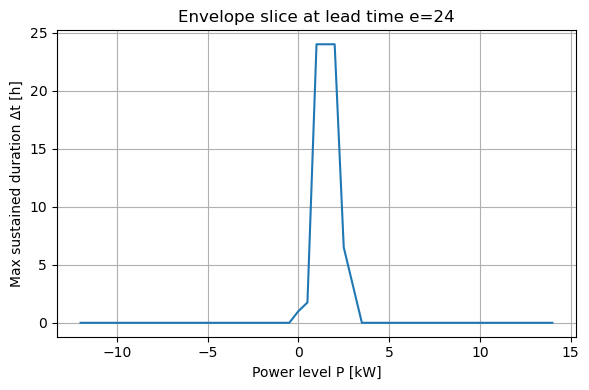

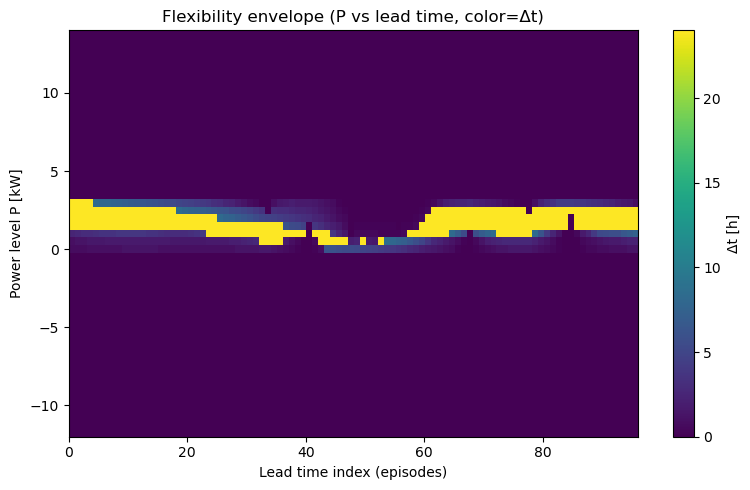

In [5]:
# 1) Slice at a chosen lead time (episode e0)
e0 = 24 # e.g., 12th 15-min step of the day (03:00)
plt.figure(figsize=(6,4))
plt.plot(P_grid, durations[:, e0]) #print the max duration for each power level at lead time e0
plt.xlabel("Power level P [kW]")
plt.ylabel("Max sustained duration Δt [h]")
plt.title(f"Envelope slice at lead time e={e0}")
plt.grid(True); plt.tight_layout(); plt.show()

# 2) Heatmap across all lead times (P vs lead time)
plt.figure(figsize=(8,5))
plt.imshow(durations, aspect='auto', origin='lower',
           extent=[0, durations.shape[1], P_grid[0], P_grid[-1]])
plt.colorbar(label="Δt [h]")
plt.xlabel("Lead time index (episodes)")
plt.ylabel("Power level P [kW]")
plt.title("Flexibility envelope (P vs lead time, color=Δt)")
plt.tight_layout(); plt.show()


In [ ]:
power_bounds_dir = "/Users/edouardpaupe/Desktop/magnify-main/data/power_bounds/"
output_csv_dir = "/Users/edouardpaupe/Desktop/magnify-main/data/flex_env/"
output_img_dir = "/Users/edouardpaupe/Desktop/magnify-main/data/flex_env_images/"
process_power_bounds(power_bounds_dir, output_csv_dir, output_img_dir)